<img src = "https://drive.google.com/uc?export=view&id=1FpwoiW7eC_aEKJ53NReEyrW8qAR3RFs0" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento del Negocio y Carga de Datos**
---

Este notebook es una plantilla que le puede servir como guía para el primer entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Juan Sebastian Malagón Torres

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio. Para ello, se debe dar respuesta a los siguientes elementos:

### **1.1. Trasfondo del Negocio**
---

- ¿Quién es el cliente o los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
- ¿Qué problemas del negocio o del dominio estamos tratando de solucionar?

En esta ocasión estaremos trabajando sobre medical MNIST (https://medmnist.com/). Un grupo de bases de datos, diseñado para la exploración de modelos machine learning y deep learning en diferentes contextos de imágenes diagnósticas. Puntualmente, se utilizará el conjunto BreastMNIST.

BreastMNIST es un conjunto de datos de imágenes de ecografía mamaria, donde se busca resolver una tarea de clasificación binaria, distinguiendo entre tumores benignos y malignos. Estos datos fueron recopilados en el 2018, de varios hospitales de estados unidos, constituyendo un total de 780 muestras.

Este es un proyecto enfocado al área médica, donde los beneficiarios del proyecto será los centros dedicados al manejo en investigación del cáncer de mama. Proveyéndoles una herramienta para la identificación adecuada de casos de interés clínico.

### **1.2. Alcance**
---

- ¿Qué  solución se desea implementar?
- ¿Cuáles son los límites y fronteras del proyecto de *machine learning*? ¿Qué aspectos específicos del negocio se incluirán y cuáles se excluyen en el alcance del proyecto?
- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

Teniendo presente los datos identificados, se plantea el desarrollo de un modelo de clasificación binaria, considerando como entrada una imagen de ecografía mamaria de baja resolución (30x30 píxeles), siendo importante considerara los siguientes aspectos por parte del usuario:

El modelo no está diseñado para el manejo de imágenes masivas, por lo que es importante que el usuario delimite la región de interés donde pude estar la lesión.
El modelo podrá discriminar entre casos malignos y benignos, sin embargo, los orígenes o características específicas de la lesión no serán incluidas como factor de decisión.
El modelo utilizará una única imagen como entrada, por lo cual el análisis desde múltiples perspectivas será labora del usuario.
El modelo bajo NINGÚN concepto remplaza la labor ni criterio de una especialista.
A través de este proyecto de busca el desarrollo de una herramienta que facilite el proceso diagnóstico y agilice la identificación de lesiones malignas en el seno por medio de imágenes de ecografía mamaria.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto como [*Jira*](https://www.atlassian.com/software/jira?&aceid=&adposition=&adgroup=144583570757&campaign=19313283508&creative=641924587890&device=c&keyword=jira%20software%20online&matchtype=p&network=g&placement=&ds_kids=p74602877891&ds_e=GOOGLE&ds_eid=700000001558501&ds_e1=GOOGLE&gad_source=1&gclid=CjwKCAiAqNSsBhAvEiwAn_tmxStBdySS6RxbLNGXE0tWTeJc32ffjQD_1EXZvH6hmQkYZm5bTa3sgBoCX3oQAvD_BwE&gclsrc=aw.ds) o [*Trello*](https://trello.com/?&aceid=&adposition=&adgroup=144675712219&campaign=19250238609&creative=641300630637&device=c&keyword=trello&matchtype=e&network=g&placement=&ds_kids=p74526213668&ds_e=GOOGLE&ds_eid=700000001557344&ds_e1=GOOGLE&gad_source=1&gclid=CjwKCAiAqNSsBhAvEiwAn_tmxWW7Gdzf0Szf-mA-piM2GPM7tk8R0HsgpBALLGHNFq1-2xXMQbxB1RoCs-sQAvD_BwE&gclsrc=aw.ds).

Acceso al tablero: https://trello.com/b/Oo9PAn77/mlds2

## **2. Datos**
---

En esta sección debe adjuntar una descripción de los datos y agregar el código que permite su tratamiento.

### **2.1. Origen**
---

- ¿De dónde vienen los datos?
- ¿Se usa alguna herramienta o proceso para la descarga de la información?
- ¿Qué tipo de datos estamos manejando?

BrestMNIST es un conjunto de 784 imágenes de ecografía mamaria disponible a través de la plataforma de descargas zendo (https://zenodo.org/records/10519652), adicionalmente pueden ser descargados por medio de la herramienta propia del proyecto instalable por medio de comando: pip install medmnist.

### **2.2. Carga o Adquisición de Datos**
---

Agregue el código necesario en _Python_ para obtener o cargar los datos.

In [1]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=98a51a68ff72a07021382b5dd92aa955937f7da8e1c9e2972ac8406bdf24999c
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [5]:
from medmnist import BreastMNIST
train_set = BreastMNIST(split="train", download=True)
val_set = BreastMNIST(split="val", download=True)
test_set = BreastMNIST(split="test", download=True)

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz


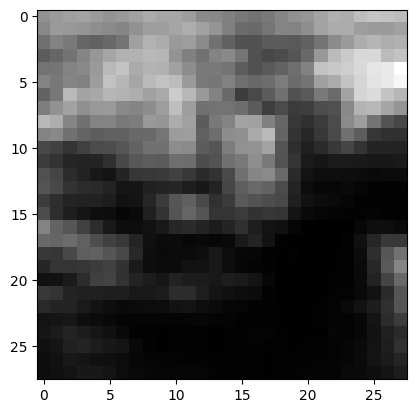

In [14]:
import matplotlib.pyplot as plt

plt.imshow(train_set.imgs[121], cmap="gray")

## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*